# Predicción con Series de Tiempo

En este laboratorio se implementan 5 métodos diferentes para predecir con series de tiempo, utilizando 4 data sets distintos.\
- Fuente de consulta: https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

In [7]:
# se cargan las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [62]:
# se cargan los data sets
df_1 = pd.read_csv("daily-total-female-births.csv")

In [63]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [64]:
df_1.index = pd.to_datetime(df_1['Date'])
df_1.drop(columns='Date',inplace=True)
df_1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [65]:
df_1.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


#### Train and split

In [66]:
#train_test_split
buf = df_1.copy()
#train_test_split
tra = buf['Births'][:181].dropna()
tes = buf['Births'][182:].dropna()

<ipython-input-67-01d32ebb6035>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(buf.Births.dropna(),freq=182)


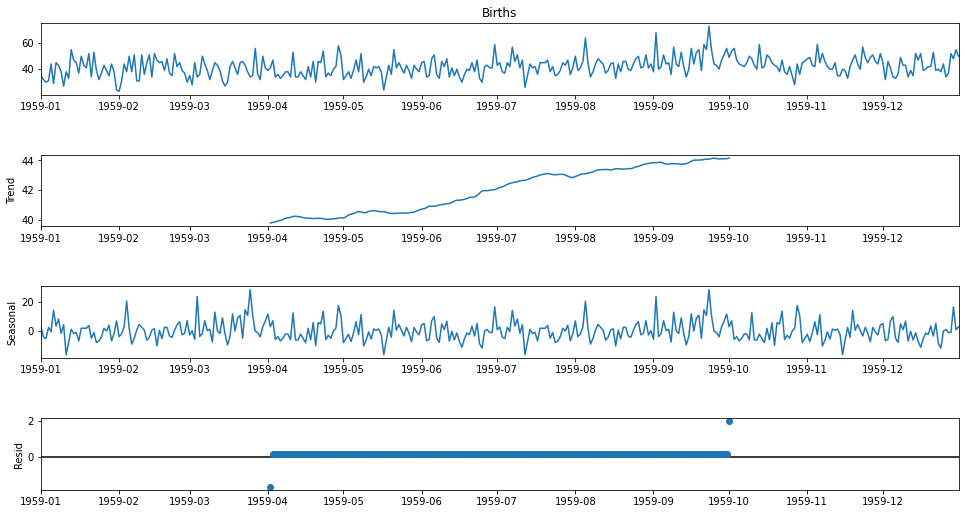

In [67]:
res = sm.tsa.seasonal_decompose(buf.Births.dropna(),freq=182)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

#### 1. Promedio

In [9]:
def prediccion_promedio(historia, config):
    n, tipo_prom = config
    if tipo_prom == "prom":
        return mean(historia[-n:])
    return median(historia[-n:])

#### 2. SARIMAX

In [73]:
#sarima = sm.tsa.statespace.SARIMAX(tra,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarima.summary()
sarimax = sm.tsa.statespace.SARIMAX(tra,order=(1,1,1),seasonal_order=(1,1,1,12),exog = tra,
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
sarimax.summary()

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Births   No. Observations:                  181
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 783.786
Date:                            Wed, 22 Sep 2021   AIC                          -1555.571
Time:                                    10:06:28   BIC                          -1537.350
Sample:                                01-01-1959   HQIC                         -1548.170
                                     - 06-30-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Births         1.0000   7.52e-08   1.33e+07      0.000       1.000       1.000
ar.L1       2.194e-11      0.001   1.57e-08      1.000      -0.003       0.003
ma.L1      -2.191e-15      0.002  -8.86e-13      1.000      -0.005       0.005
ar.S.L12    4.513e-10   1.29e-09      0.349      0.727   -2.09e-09    2.99e-09
ma.S.L12   -1.787e-17    9.3e-05  -1.92e-13      1.000      -0.000       0.000
sigma2          1e-10   1.64e-10      0.610      0.542   -2.21e-10    4.21e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20204.27
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            -3.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.18e+19. Standard errors may be unstable.
"""

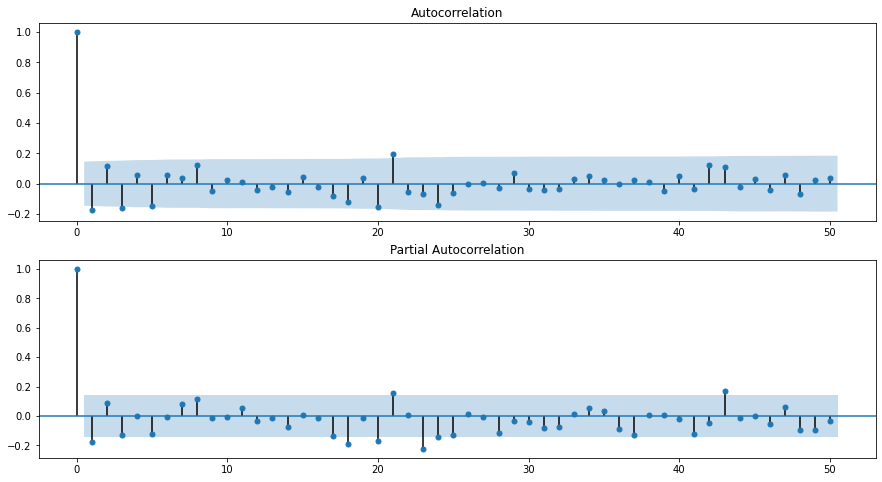

In [74]:
res = sarima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [78]:
'''from sklearn.metrics import mean_squared_error
pred = sarimax.predict('1959-06-31','1959-12-31',exog = tes)[1:]
print('SARIMAX model MSE:{}'.format(mean_squared_error(tes,pred)))'''

"from sklearn.metrics import mean_squared_error\npred = sarimax.predict('1959-06-31','1959-12-31',exog = tes)[1:]\nprint('SARIMAX model MSE:{}'.format(mean_squared_error(tes,pred)))"

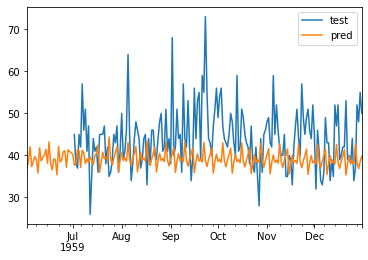

In [77]:
pd.DataFrame({'test':tes,'pred':pred}).plot();plt.show()

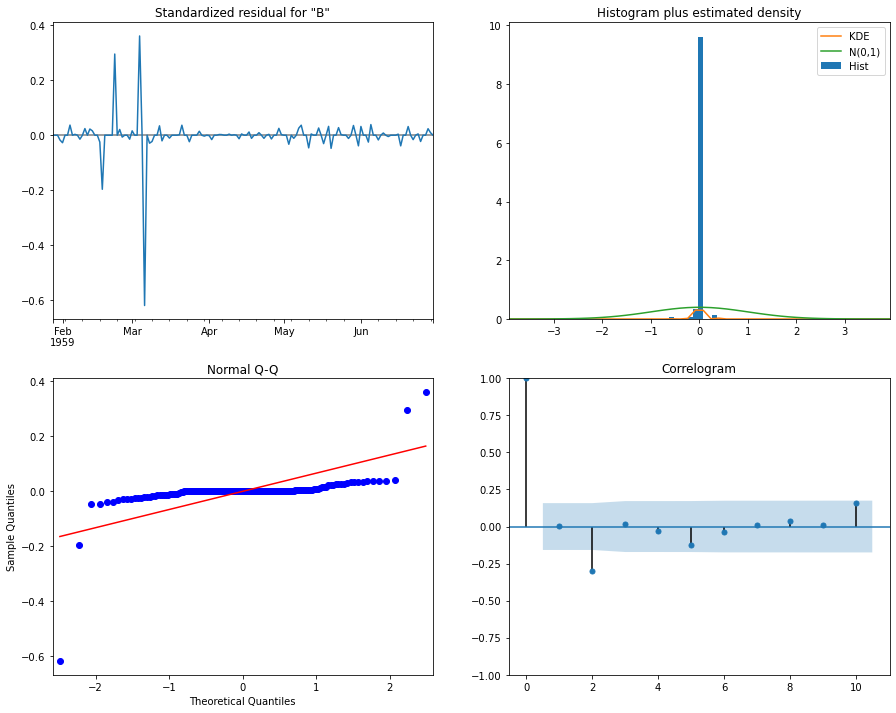

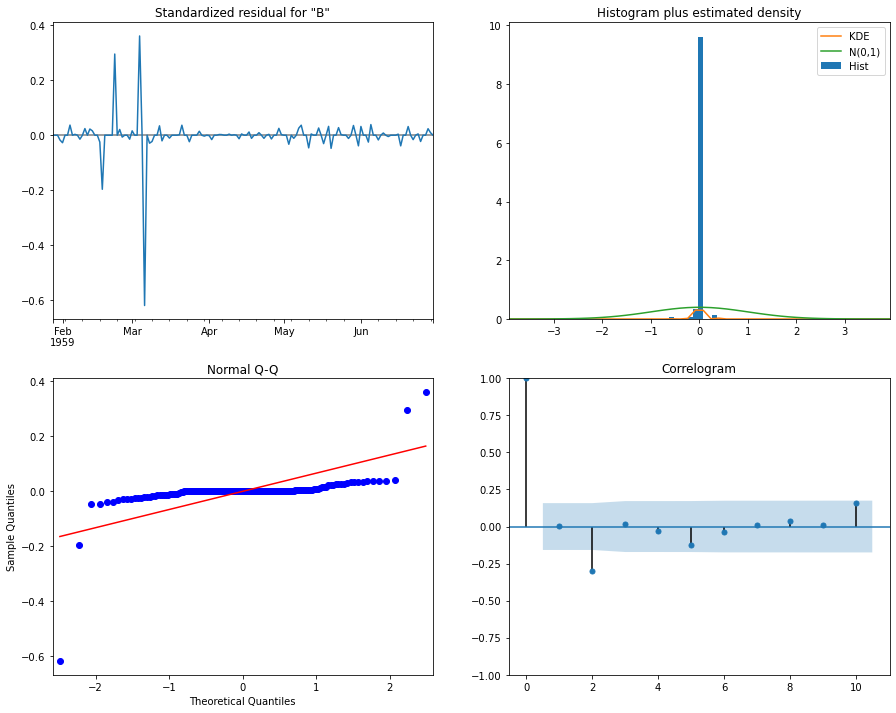

In [79]:
sarimax.plot_diagnostics(figsize=(15, 12))

In [20]:
'''import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_1['Births'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df_1['forecast']=results.predict(start=90,end=103,dynamic=True)
df_1[['Births','forecast']].plot(figsize=(12,8))'''

"import statsmodels.api as sm\nmodel=sm.tsa.statespace.SARIMAX(df_1['Births'],order=(1, 1, 1),seasonal_order=(1,1,1,12))\nresults=model.fit()\ndf_1['forecast']=results.predict(start=90,end=103,dynamic=True)\ndf_1[['Births','forecast']].plot(figsize=(12,8))"

In [21]:
'''from pandas.tseries.offsets import DateOffset
pred_date=[df_1.index[-1] + DateOffset(months=x)for x in range(0,24)]
pred_date=pd.DataFrame(index=pred_date[1:],columns=df_1.columns)
pred_date'''

'from pandas.tseries.offsets import DateOffset\npred_date=[df_1.index[-1] + DateOffset(months=x)for x in range(0,24)]\npred_date=pd.DataFrame(index=pred_date[1:],columns=df_1.columns)\npred_date'

In [22]:
'''df_1=pd.concat([df_1,pred_date])
df_1['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
df_1[['Births', 'forecast']].plot(figsize=(12, 8))'''

"df_1=pd.concat([df_1,pred_date])\ndf_1['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  \ndf_1[['Births', 'forecast']].plot(figsize=(12, 8))"

#### 3. Winter-Holt

In [12]:
def AlisamientoExponencial(historia, t, d, s, p, b, r):
    historia = array(historia)
    modelo = ExponentialSmoothing(historia, trend = t, damped = d,
                                  seasonal = s, seasonal_periods = p)
    modelo_ajustado = modelo.fit(optimized = True, use_boxcox = b, remove_bias = r)
    yhat = modelo_ajustado.predict(len(historia), len(historia))
    return yhat[0]

#### 4. Red Neuronal

In [13]:
#Transformación de series
def series_a_supervisado(datos, n_entrada, n_salida = 1):
    df = DataFrame(datos)
    columnas = [ ]
    for i in range(n_entrada, 0, -1):
        columnas.append(df.shift(-1))
    for i in range(0, n_salida):
        columnas.appemd(df.shift(-1))
    agregado = concat(columnas, axis = 1)
    agregado.dropna(inplace = true)
    return agregado.values

#Predicción con Tensorflow y Keras
def prediccion_red_neuronal(historia, n_entrada, n_nodos, n_epocas, tamanio_tandas):
    datos = series_a_supervisado(historia, n_entrada)
    entreno_X, entreno_y = datos[:, :-1], datos[:, -1]
    modelo = Sequential()
    modelo.add(Dense(n_nodes, activation='relu', input_dim=n_entrada))
    modelo.add(layers.Dense(1))
    modelo.compile(loss = "mse", optimizer = "adam")
    modelo_ajustado = modelo.fit(entreno_X, entreno_y, epochs = n_epocas,
    batch_size = tamanio_tandas, verbose = 0)
    x_entrada = array(historia[-n_entrada:]).reshape(1, n_entrada)
    yhat = modelo.predict(x_entrada, verbose = 0)
    return yhat[0]

#### 5. FB Prophet

In [19]:
from prophet import Prophet

ModuleNotFoundError: No module named 'prophet'

In [14]:
#Requiere de una pequeña transformación de los datos a usar
series = pd.read_csv("monthly-car-sales.csv", header = 0, index_col = None)
series["ds"] = pd.to_datetime(series["Month"])
series["y"] = series[["Sales"]].astype(float)
series = series[["ds", "y"]]
series.head( )

#Ejecución
modelo = Prophet(mcmc_samples = 500, seasonality_mode = "multiplicative")
modelo_ajustado = modelo.fit(series)
futuro = modelo_ajustado.make_future_dataframe(periods = 48, freq = "M")
prediccion = modelo_ajustado.predict(futuro)
prediccion[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail( )

NameError: name 'Prophet' is not defined